In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(style="darkgrid")

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
dataset=pd.read_csv("/content/Netflix Dataset.csv")

In [6]:
print("Dataset shape: ",dataset.shape)

Dataset shape:  (7789, 11)


In [7]:
print("\n Columns: ",dataset.columns.tolist())


 Columns:  ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [8]:
print("\n Missing Values: \n ",dataset.isnull().sum())


 Missing Values: 
  Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


Data Cleaning

In [9]:
dataset['Release_Date']=pd.to_datetime(dataset['Release_Date'],errors='coerce')

In [10]:
dataset['Year']=dataset['Release_Date'].dt.year

In [11]:
dataset['Director']=dataset['Director'].fillna("unknown")

In [12]:
dataset['Cast']=dataset['Cast'].fillna("unknown")

In [13]:
dataset['Country']=dataset['Country'].fillna("unknown")

In [14]:
dataset['Rating']=dataset['Rating'].fillna("Not Rated")

In [15]:
dataset['Main_Genre']=dataset['Type'].apply(
    lambda x:x.split(",")[0].strip() if pd.notnull(x) else "Unknown"
)

In [16]:
dataset['Main_Genre']

,Main_Genre
0,International TV Shows
1,Dramas
2,Horror Movies
3,Action & Adventure
4,Dramas
...,...
7784,Dramas
7785,Dramas
7786,Documentaries
7787,International TV Shows


EDA

In [17]:
print("\n Category Distribution :\n ",dataset['Category'].value_counts())


 Category Distribution :
  Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [18]:
print("\n Top 5 Countries:\n ",dataset['Country'].value_counts().head(5))


 Top 5 Countries:
  Country
United States     2556
India              923
unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [19]:
print("\n Dataset covers years from ",dataset['Year'].min()," to ",dataset['Year'].max())


 Dataset covers years from  2008.0  to  2021.0


Analysis & visualization

1. Line Chart-Movies vs TV SHOws Released per Year

In [20]:
content_trend=dataset.groupby(['Year','Category']).size().reset_index(name='Count')

In [21]:
content_trend

,Year,Category,Count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,5


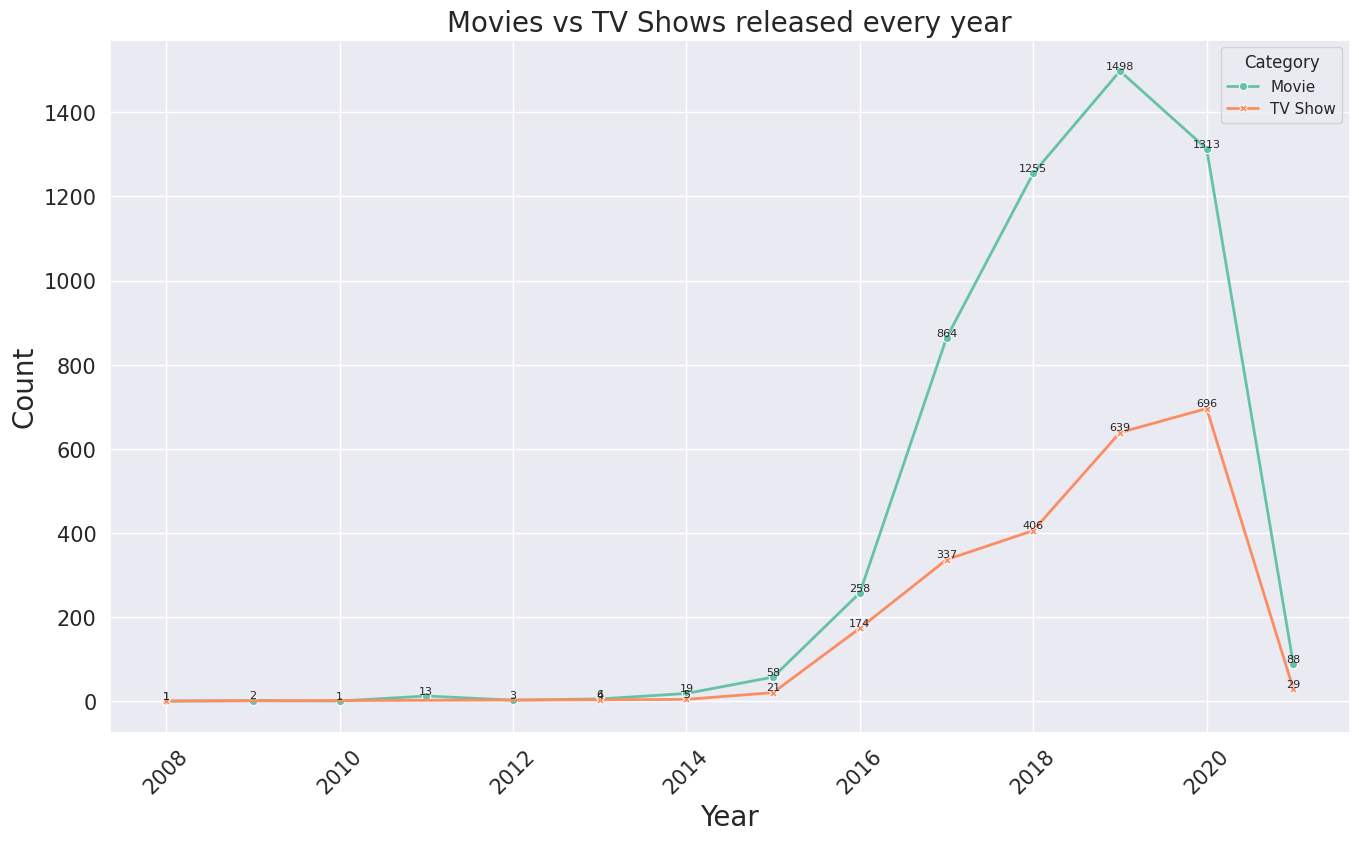

In [33]:
# Enhanced lineplot
sns.lineplot(
    data=content_trend,
    x='Year',
    y='Count',
    hue='Category',
    style='Category',
    markers=True,
    dashes=False,
    linewidth=2,
    palette='Set2'
)

# Add data labels at each point
for category in content_trend['Category'].unique():
    subset = content_trend[content_trend['Category'] == category]
    for x, y in zip(subset['Year'], subset['Count']):
        plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')


plt.title("Movies vs TV Shows released every year",fontsize=20)

plt.xlabel("Year",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.legend(title='Category')
plt.show()

Bar Chart Top 10 Genres


In [32]:
top_genres=dataset['Main_Genre'].value_counts().head(10)

/tmp/ipython-input-1996529774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


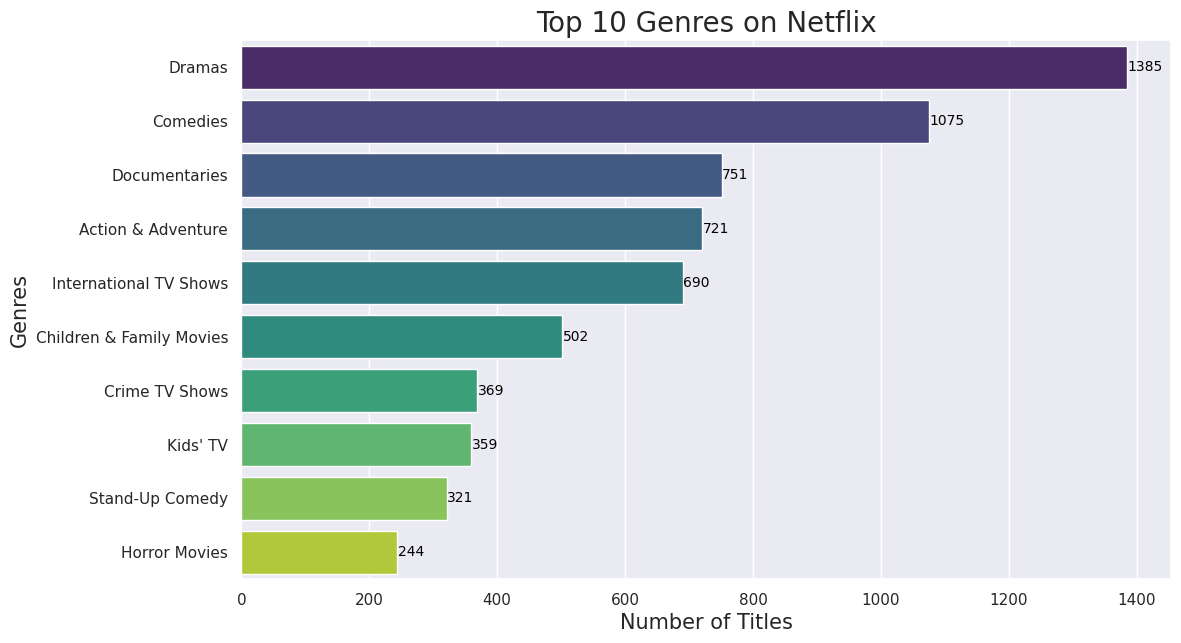

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette='viridis'
)

# Add data labels
for i, v in enumerate(top_genres.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

plt.title("Top 10 Genres on Netflix",fontsize=20)
plt.xlabel("Number of Titles",fontsize=15)
plt.ylabel("Genres",fontsize=15)
plt.show()

stacked bar chart -Movies vs TV SHOWS FOR TOP 10 COUNTRIES

<Figure size 1400x800 with 0 Axes>

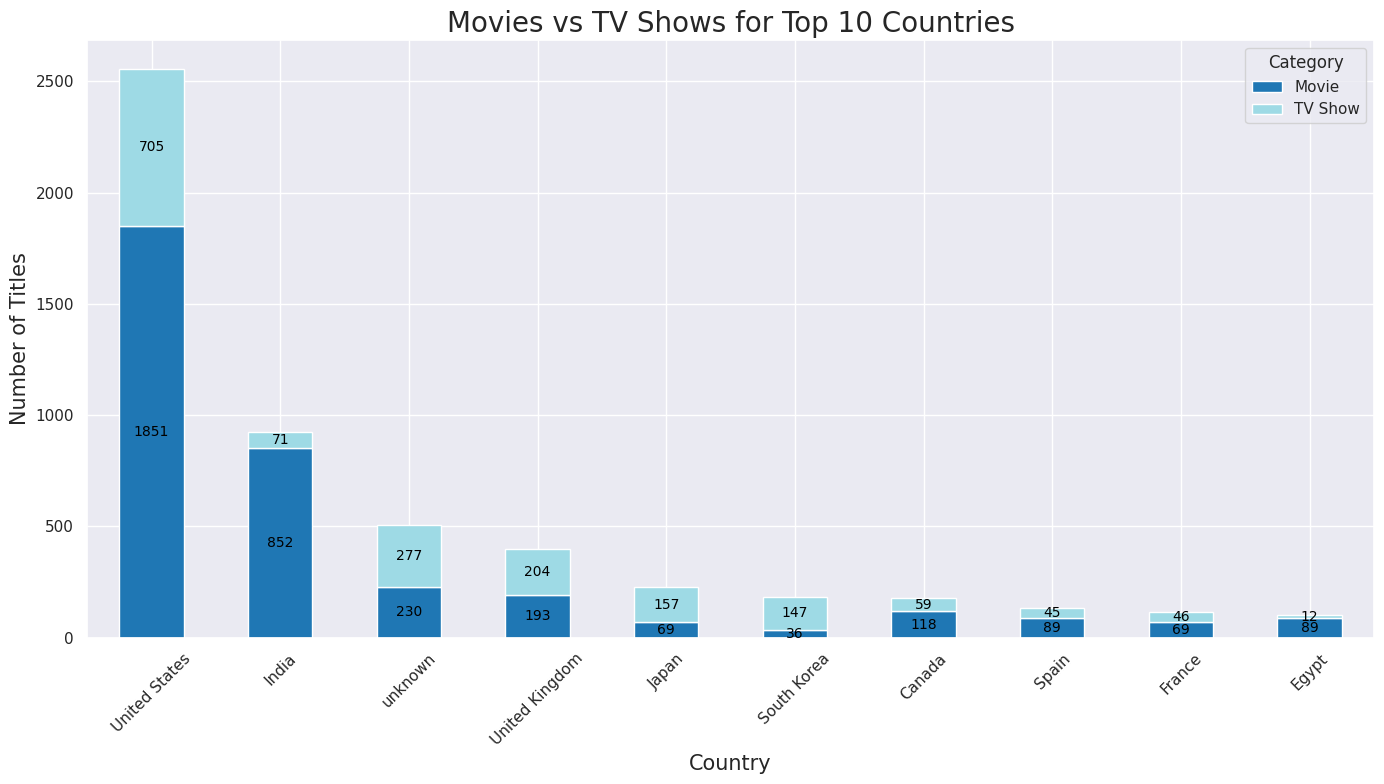

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = dataset['Country'].value_counts().head(10).index
country_data = dataset[dataset['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country','Category']).size().unstack()
stacked['Total'] = stacked.sum(axis=1)
stacked = stacked.sort_values('Total', ascending=False).drop(columns='Total')
plt.figure(figsize=(14,8))
stacked.plot(kind='bar', stacked=True, colormap="tab20", figsize=(14,8))
plt.title("Movies vs TV Shows for Top 10 Countries", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of Titles", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Category')
for idx, country in enumerate(stacked.index):
    bottom = 0
    for col in stacked.columns:
        plt.text(idx, bottom + stacked.loc[country, col]/2, str(stacked.loc[country, col]),
                 ha='center', va='center', fontsize=10, color='black')
        bottom += stacked.loc[country, col]

plt.tight_layout()
plt.show()


Choropleth Map - Country wise content

In [44]:
country_counts=dataset['Country'].value_counts().reset_index()
country_counts.columns=['Country','Count']
country_counts.head()

,Country,Count
0,United States,2556
1,India,923
2,unknown,507
3,United Kingdom,397
4,Japan,226


In [47]:
figure = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    hover_data=["Count"],
    color_continuous_scale="viridis",
    title="Netflix Content by Country"
)
figure.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    title_font_size=20,
    coloraxis_colorbar=dict(title="Number of Titles")
)
figure.show()

Trend Line-Growth of Popular Genres

In [50]:
dataset.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year',
       'Main_Genre'],
      dtype='object')

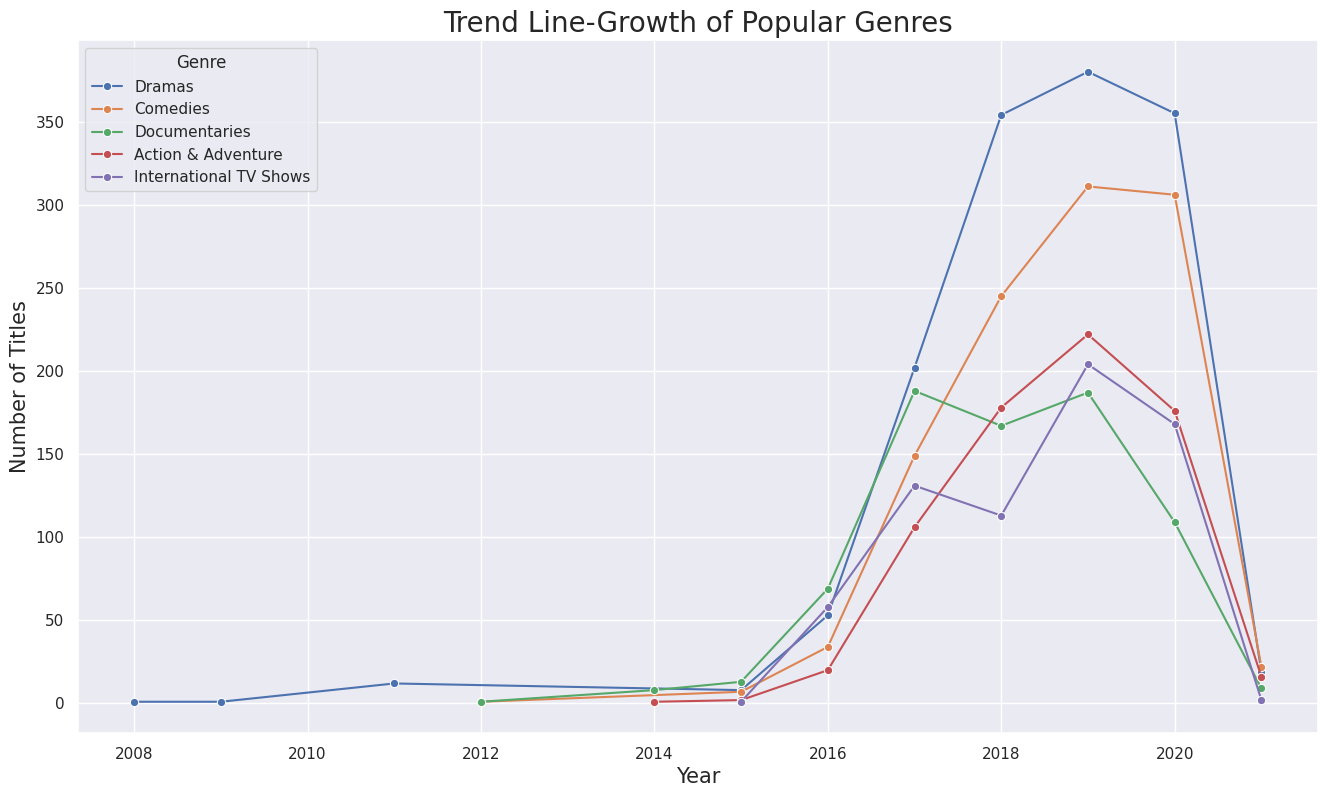

In [53]:
popular_genres=dataset['Main_Genre'].value_counts().head(5).index

genre_trends=dataset[dataset['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends,x='Year',y='Count',hue='Main_Genre',marker='o')

plt.title("Trend Line-Growth of Popular Genres",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Titles",fontsize=15)
plt.legend(title="Genre")
plt.show()

In [54]:
movies_tv = content_trend.groupby('Category')['Count'].sum()
total_movies = movies_tv.get('Movie', 0)
total_tv = movies_tv.get('TV Show', 0)

print("----- INSIGHTS -----\n")
print(f"1. Netflix catalog has a total of {total_movies} Movies and {total_tv} TV Shows.")
print("   - Movies dominate the catalog, but TV Shows have been growing steadily over the years.")
print("   - Growth of TV Shows has accelerated after 2016, reflecting Netflix's focus on series and originals.\n")

print("2. Top Genres on Netflix:")
for i, genre in enumerate(top_genres.index, 1):
    count = top_genres.values[i-1]
    print(f"   {i}. {genre}: {count} titles")
print("   - Drama and Comedy are consistently the most popular genres.\n")

top_countries_counts = country_data['Country'].value_counts().head(10)
print("3. Top 10 countries contributing to Netflix content:")
for i, (country, count) in enumerate(top_countries_counts.items(), 1):
    print(f"   {i}. {country}: {count} titles")
print("   - The United States, India, and the UK are the largest content contributors.")
print("   - Other countries contribute less, highlighting opportunities for regional content expansion.\n")

print("----- STRATEGIC RECOMMENDATIONS -----\n")
print("1. Increase production and acquisition of high-performing genres like Drama, Comedy, and Documentary.")
print("2. Expand local content in underrepresented countries to attract new subscribers and improve global reach.")
print("3. Maintain a balance between Movies and TV Shows, focusing on TV Shows for long-term engagement.")
print("4. Monitor emerging genres and trends yearly to adapt the content library dynamically.")
print("5. Consider collaborations with local creators to boost diversity and market penetration.")


----- INSIGHTS -----

1. Netflix catalog has a total of 5379 Movies and 2312 TV Shows.
   - Movies dominate the catalog, but TV Shows have been growing steadily over the years.
   - Growth of TV Shows has accelerated after 2016, reflecting Netflix's focus on series and originals.

2. Top Genres on Netflix:
   1. Dramas: 1385 titles
   2. Comedies: 1075 titles
   3. Documentaries: 751 titles
   4. Action & Adventure: 721 titles
   5. International TV Shows: 690 titles
   6. Children & Family Movies: 502 titles
   7. Crime TV Shows: 369 titles
   8. Kids' TV: 359 titles
   9. Stand-Up Comedy: 321 titles
   10. Horror Movies: 244 titles
   - Drama and Comedy are consistently the most popular genres.

3. Top 10 countries contributing to Netflix content:
   1. United States: 2556 titles
   2. India: 923 titles
   3. unknown: 507 titles
   4. United Kingdom: 397 titles
   5. Japan: 226 titles
   6. South Korea: 183 titles
   7. Canada: 177 titles
   8. Spain: 134 titles
   9. France: 115 tit